This tutorial will show how to use and modify the data generator pack for Tacton.
Data objects that are relevant for this project are:
C_data - Combination data, 
D_data - Discount data, 
p_data - probability data, 
deal_data - Quote outcome. 
For more information regarding the algorithms behind the data generator: 
https://docs.google.com/document/d/10QUrTwTu61wxq57S-zQgsrRc2BtC6QuKa8mXj4Q4f84/edit

In [1]:
import numpy as np
from matplotlib import pylab as plt
from generate_cpq_data_class import *


The Generator_pack creates a C-gen (Combinations/dimensions-generator), D_gen (Discount-generator), a P (Probability function) and a corresponding P_gen (Probability-generator).

We start this tutortial by initiate a Generator_pack G. discount_max, discount_min, discount_mean, discount_std are parameters for the distribution of the discount data (truncated normal distribution). mean_p and max_p are parameters for the probability distribution. 

In [2]:
G=Generator_pack(discount_max = 0.4, discount_min=0, discount_mean = 0.15, discount_std = 0.2, mean_p = 0.2,
                  max_p = 0.4)



To generate C-data, D-data, p_data and deal_data from the Generator_pack G we just call G.generate_data()

In [3]:
C_data, D_data, p_data, deal_data = G.generate_data(copyfunction=lambda: int(np.maximum(0,np.random.normal(1,0.2))))


Generated data:  3070 / 3070


In [4]:
print("C_data shape: ", C_data.shape)
print("D_data shape: ", D_data.shape)
print("p_data shape: ", p_data.shape)
print("deal_data shape: ", deal_data.shape)

C_data shape:  (3070, 30)
D_data shape:  (3070,)
p_data shape:  (3070,)
deal_data shape:  (3070,)


Here we show plots of the p(d) function for some C values.

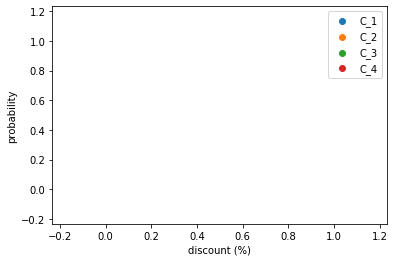

In [5]:
C_1 = [3,3,1,1,8,0]
C_1_oh = one_hot(C_1)
ind1 = np.where(np.array([list(C_) == list(C_1_oh) for C_ in C_data]))
C_2 = [3,3,1,1,8,1]
C_2_oh = one_hot(C_2)
ind2 = np.where(np.array([list(C_) == list(C_2_oh) for C_ in C_data]))
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))

C_4 = [0,1,0,3,11,2]
C_4_oh = one_hot(C_4)
ind4 = np.where(np.array([list(C_) == list(C_4_oh) for C_ in C_data]))
#plt.scatter(D_data, p_data, alpha =0.1, label='all C')

plt.scatter(D_data[ind1], p_data[ind1],label='C_1')
plt.scatter(D_data[ind2], p_data[ind2],label='C_2')
plt.scatter(D_data[ind3], p_data[ind3],label='C_3')
plt.scatter(D_data[ind4], p_data[ind4],label='C_4')
plt.xlabel('discount (%)')
plt.ylabel('probability')
plt.legend()
plt.show()
plt.close()

part  0 :  0.106 * sigmoid( 72.459  * d -  10.648 , center at d =  0.147
part  1 :  0.098 * sigmoid( 59.548  * d -  12.408 , center at d =  0.208
part  2 :  0.105 * sigmoid( 75.049  * d -  12.913 , center at d =  0.172
part  3 :  0.12 * sigmoid( 76.109  * d -  16.391 , center at d =  0.215
part  4 :  0.096 * sigmoid( 73.214  * d -  16.065 , center at d =  0.219


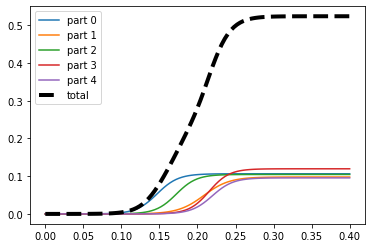

In [6]:
G.P.get_p_data(C_1,plot=True)

part  0 :  0.108 * sigmoid( 75.173  * d -  9.933 , center at d =  0.132
part  1 :  0.101 * sigmoid( 59.322  * d -  12.765 , center at d =  0.215
part  2 :  0.114 * sigmoid( 67.902  * d -  7.55 , center at d =  0.111
part  3 :  0.117 * sigmoid( 71.438  * d -  14.128 , center at d =  0.198
part  4 :  0.094 * sigmoid( 76.273  * d -  17.41 , center at d =  0.228


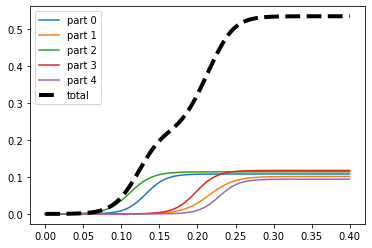

In [7]:
G.P.get_p_data(C_2,plot=True)

part  0 :  0.091 * sigmoid( 70.374  * d -  12.827 , center at d =  0.182
part  1 :  0.116 * sigmoid( 61.404  * d -  15.336 , center at d =  0.25
part  2 :  0.088 * sigmoid( 65.133  * d -  19.148 , center at d =  0.294
part  3 :  0.106 * sigmoid( 40.272  * d -  8.234 , center at d =  0.204
part  4 :  0.083 * sigmoid( 55.354  * d -  8.391 , center at d =  0.152


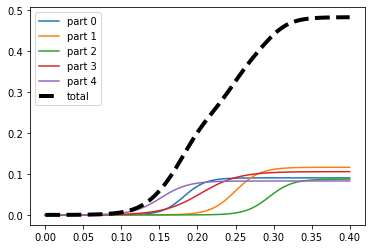

In [8]:
C_3 = [0,1,0,3,2,2]

G.P.get_p_data(C_3,plot=True)

## Manipulate the p(d) function for a specific C
We update the p(d) function for C_3 = [0,1,0,3,2,2]. The function call is G.set_C(C,p,n,d), 
### Parameters:
- C - the dimension you want to update (you can write C in both standard form or one hot)
- p - probability function of d. Simplest way of writting function calls is by using lambda expression.
- n - frequncy function. Nr of times you want C to appear in the data. The example below "n = lambda: 100" always returns 100 data points of C when calling G.generate_data()
- d_dist - distribution function of d for C. The example below "d_dist = np.random.rand()" returns a random value between 0-1 (Uniform distribution). If you want other ranges for d_dist e.g. range: mind - maxd, call "d_dist = np.random.rand()*(maxd - mind) + mind".

If you don't want specify p, n or d_dist you can safely ignore them.


In [9]:
G.set_C(C_3, p=lambda d:np.sin(d*np.pi*2/0.4), n= lambda: 100, d_dist=np.random.rand)

In [10]:
C_data, D_data, p_data, deal_data = G.generate_data(copyfunction=lambda: int(np.maximum(0,np.random.normal(1,0.2))))


Generated data:  3132 / 3132


In [11]:
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))
print("ind3 shape: ", ind3[0].shape)
print("C data shape: ", C_data.shape)

ind3 shape:  (100,)
C data shape:  (3132, 30)


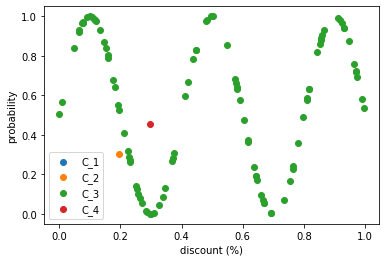

In [12]:
C_1 = [3,3,1,1,8,0]
C_1_oh = one_hot(C_1)
ind1 = np.where(np.array([list(C_) == list(C_1_oh) for C_ in C_data]))
C_2 = [3,3,1,1,8,1]
C_2_oh = one_hot(C_2)
ind2 = np.where(np.array([list(C_) == list(C_2_oh) for C_ in C_data]))
C_3 = [0,1,0,3,2,2]
C_3_oh = one_hot(C_3)
ind3 = np.where(np.array([list(C_) == list(C_3_oh) for C_ in C_data]))

C_4 = [0,1,0,3,11,2]
C_4_oh = one_hot(C_4)
ind4 = np.where(np.array([list(C_) == list(C_4_oh) for C_ in C_data]))
#plt.scatter(D_data, p_data, alpha =0.1, label='all C')

plt.scatter(D_data[ind1], p_data[ind1],label='C_1')
plt.scatter(D_data[ind2], p_data[ind2],label='C_2')
plt.scatter(D_data[ind3], p_data[ind3],label='C_3')
plt.scatter(D_data[ind4], p_data[ind4],label='C_4')
plt.xlabel('discount (%)')
plt.ylabel('probability')
plt.legend()
plt.show()
plt.close()

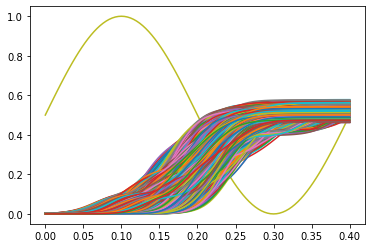

In [14]:
C_combinations = G.C_gen(complete_set=True, copys=1)
dl = np.linspace(0,0.4,101)
itt=0
for C in C_combinations[::1]:
    C_ = np.tile(np.expand_dims(C,0),(101,1))
    #print("C_ shape: ", C_.shape)
    pC = np.squeeze(G.P.p(C_,dl,no_print=True))
    #print("pC shape: ", pC.shape)
    plt.plot(dl,pC)
    itt+=1
    if itt%100==0:
        print("itt: ", itt, end="\r", flush=True)
plt.show()